## PA

In [ ]:
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import Perceptron
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
X,y=fetch_openml('mnist_784',version=1,return_X_y=True)
print(X)
print(y)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [ ]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [ ]:
X=X.to_numpy()
y=y.to_numpy()

In [ ]:
print(X[2022])
print(y[2022])
print(X[2022].mean())
unique_values, unique_counts = np.unique(X[2022], return_counts=True)
print(unique_values, unique_counts)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  48.  18.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   3.  71. 149. 223. 242. 230.
 223. 153.  29.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

In [ ]:
X_train = X[:10000]
y_train = y[:10000]
X_test = X[10000:12000]
y_test = y[10000:12000]

In [ ]:
print(len(np.unique(y_train)))
print(np.count_nonzero(y_train == '6'))
print(np.count_nonzero(y_train == '9'))
print(len(np.unique(y_test)))
max=np.count_nonzero(y_train == '9')
res=20
for i in range(10):
  print(np.count_nonzero(y_train == str(i)), end=' ')

10
1014
978
10
1001 1127 991 1032 980 863 1014 1070 944 978 

In [ ]:
X_6_indices = np.where(y_train=='6')
X_9_indices = np.where(y_train=='9')

In [ ]:
X_6_indices_test = np.where(y_test=='6')
X_9_indices_test = np.where(y_test=='9')

In [ ]:
x_positive = X_train[X_6_indices]
x_negative = X_train[X_9_indices]
print(x_positive.shape)

(1014, 784)


In [ ]:
x_positive_test = X_test[X_6_indices_test]
x_negative_test = X_test[X_9_indices_test]
print(x_positive_test.shape)

(194, 784)


In [ ]:
X_new = np.vstack((x_positive,x_negative))
X_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_new_test = np.vstack((x_positive_test,x_negative_test))
X_new_test[199]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
x_one_label=np.ones(x_positive.shape[0])
x_min_one_label=np.ones(x_negative.shape[0])*-1
y_new=np.hstack((x_one_label,x_min_one_label))

In [ ]:
x_one_label_test=np.ones(x_positive_test.shape[0])
x_min_one_label_test=np.ones(x_negative_test.shape[0])*-1
y_new_test=np.hstack((x_one_label_test,x_min_one_label_test))

In [ ]:
print(X_new.shape)
y_new.shape

(1992, 784)


(1992,)

In [ ]:
print(X_new_test.shape)
y_new_test.shape

(409, 784)


(409,)

In [ ]:
shuffle(X_new, y_new, random_state=1729)
#shuffle(y_new,random_state=1729)

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ 1., -1., -1., ..., -1., -1., -1.])]

In [ ]:
shuffle(X_new_test, y_new_test, random_state=1729)
#shuffle(y_new_test,random_state=1729)

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,
         1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1., -1.,
        -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,
         1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,
         1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,
        -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,
        -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,
         1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.,
         1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
         1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,
        -1., -1., -1.

In [ ]:
perceptron_model=Perceptron(random_state=1729, eta0=1, max_iter=1, shuffle=False, fit_intercept=True, alpha=0, warm_start=True, penalty=None)

In [ ]:
perceptron_model.fit(X_new,y_new)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(alpha=0, eta0=1, max_iter=1, random_state=1729, shuffle=False,
           warm_start=True)

In [ ]:
for i in range(10):
  perceptron_model.fit(X_new, y_new)
  print(perceptron_model.intercept_)
print(perceptron_model.coef_[0][68])

[-2.]
[-3.]
[-3.]
[-3.]
[-3.]
[-4.]
[-4.]
[-5.]
[-5.]
[-5.]
0.0


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_grad

## GA

In [ ]:
X_train = X[:10000]
y_train = y[:10000]
X_test = X[10000:12000]
y_test = y[10000:12000]

In [ ]:
X_5_indices = np.where(y_train=='5')
X_3_indices = np.where(y_train=='3')
X_5_indices_t = np.where(y_test=='5')
X_3_indices_t = np.where(y_test=='3')

In [ ]:
X_5 = X_train[X_5_indices]
X_3 = X_train[X_3_indices]
X_5_t = X_test[X_5_indices_t]
X_3_t = X_test[X_3_indices_t]

In [ ]:
print(X_5.shape)
print(X_3.shape)

(863, 784)
(1032, 784)


In [ ]:
X_final = np.row_stack((X_5, X_3))
y_final = np.concatenate(([1] * X_5.shape[0], [-1] * X_3.shape[0]))

In [ ]:
print(X_final.shape)
y_final.shape

(1895, 784)


(1895,)

In [ ]:
X_final_t = np.row_stack((X_5_t, X_3_t))
y_final_t = np.concatenate(([1] * X_5_t.shape[0], [-1] * X_3_t.shape[0]))

In [ ]:
print(X_final_t.shape)
y_final_t.shape

(381, 784)


(381,)

In [ ]:
per_mod=Perceptron(random_state=42, eta0=1, max_iter=1, penalty=None, alpha=0, shuffle=True, fit_intercept=True, warm_start=True)

In [ ]:
for epoch in range(100):
  per_mod.fit(X_final,y_final)
print(perceptron_model.intercept_)
print(perceptron_model.coef_)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_grad

[-5.]
[[ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.550e+02
   3.290e+02  6.170e+02  4.620e+02  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
per_mod.score(X_final, y_final)

0.9857519788918205

In [ ]:
per_mod.score(X_final_t, y_final_t)

0.958005249343832

In [ ]:
y_hat_test = per_mod.predict(X_final_t)

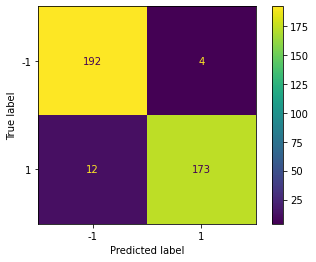

In [ ]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_final_t, y_hat_test, values_format='.5g')